**VISU 3 - Películas de Disney**

In [1]:
!pip install pandas==1.4.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 22.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 1.4.2 which is incompatible.


In [2]:
import pandas as pd

In [3]:
# Change the file directory to yours, the files are in a public folder in google drive:
# https://drive.google.com/drive/folders/1CsvJs0xZ9SCLtG4ci2dNGCkhqnI-1DLS?usp=drive_link
df_movies = pd.read_csv('/content/drive/MyDrive/2022/Orga_de_Datos/Datasets/disney_movies.csv', usecols=['genre', 'inflation_adjusted_gross'])

In [4]:
df_movies = df_movies.groupby(['genre']).agg({'inflation_adjusted_gross':lambda x: sum(x)})
df_movies = df_movies.reset_index()
df_movies['inflation_adjusted_gross'] = df_movies.apply(lambda x : x['inflation_adjusted_gross']/1000000, axis = 1)

In [5]:
column_order = df_movies.sort_values(by='inflation_adjusted_gross', ascending=False)['genre'].values.tolist()

In [6]:
df_movies

,genre,inflation_adjusted_gross
0,Action,5498.936786
1,Adventure,24561.266158
2,Black Comedy,156.730475
3,Comedy,15409.526913
4,Concert/Performance,114.821678
5,Documentary,203.488418
6,Drama,8195.804484
7,Horror,140.483092
8,Musical,9657.565776
9,Romantic Comedy,1788.872933


In [7]:
!pip install matplotlib==3.5.2
!pip install seaborn==0.11.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 23.4 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


Text(0.5, 0, '')

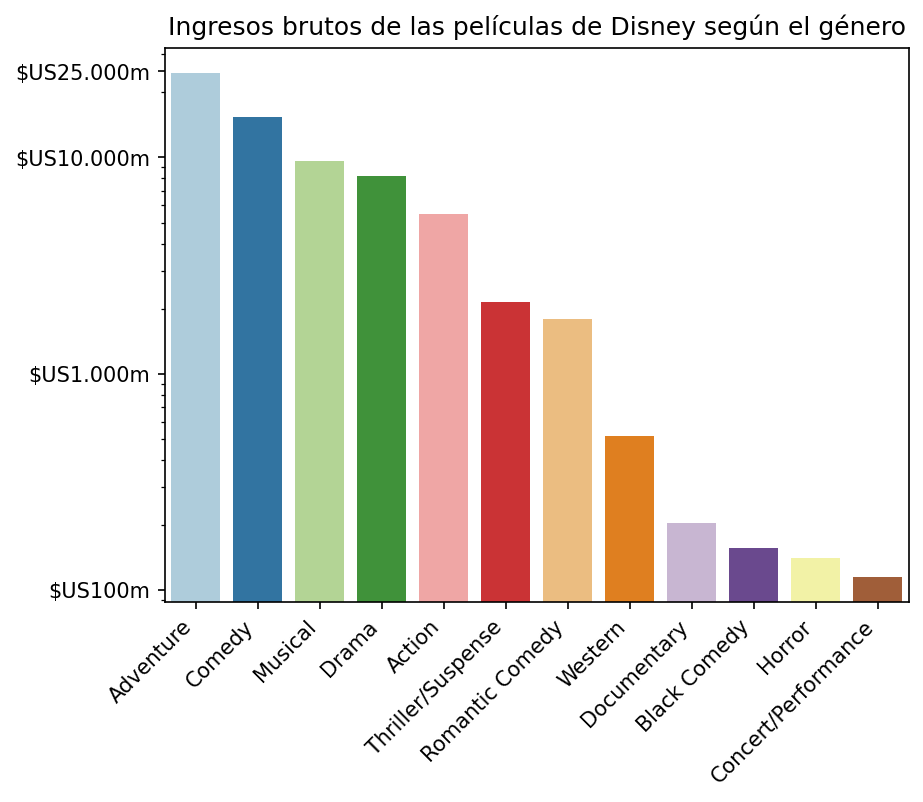

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(dpi=150)

plt.title("Ingresos brutos de las películas de Disney según el género")
ax = sns.barplot(data=df_movies, x='genre', y='inflation_adjusted_gross', order=column_order, palette=sns.color_palette("Paired", n_colors=12))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_yscale("log")
plt.yticks([100, 1000, 10000, 25000], ["$US100m", "$US1.000m", "$US10.000m", "$US25.000m"])

ax.set_ylabel("")
ax.set_xlabel("")